In [1]:
import pandas as pd
import numpy as np

In [2]:
# titanic 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep = ',',) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


In [11]:
# 데이터 dimension 확인
titanic.shape

(891, 8)

In [4]:
# 6.1 결측치 존재 여부 확인
# NaN 값, 즉 결측치는 정확한 분석을 방해하거나 오류를 발생 시킬 수 있음

In [14]:
# 0) 열 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


<AxesSubplot:>

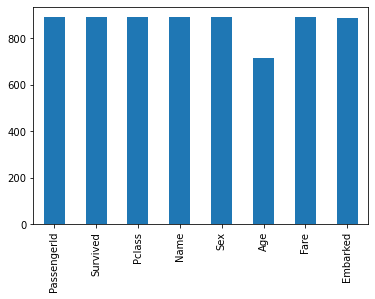

In [5]:
# 1) 시각화 - 열 데이터 개수를 직접 비교
titanic.count()
titanic.count().plot(kind ='bar')

<AxesSubplot:>

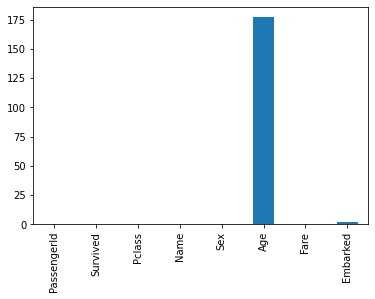

In [9]:
# 2) null 값의 개수 확인
# 전체 데이터 중 결측치가 있을 경우 True로 표시
titanic.isnull().sum()
titanic.isnull().sum().plot(kind = 'bar')

In [12]:
# 6.2 결측치 제거
# 결측치가 하나라도 있으면 제거
titanic2 = titanic.copy()
titanic2.dropna(inplace = True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [15]:
# 6.3 결측치 채우기
# 1) 평균값으로 채우기
titanic2 = titanic.copy()
mean_age = titanic2['Age'].mean()
titanic2['Age'].fillna(mean_age, inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [17]:
# 2) 직전 행의 값 또는 바로 다음 행의 값으로 채우기
titanic2 = titanic.copy()
# Age 열의 누락된 값을 바로 앞의 값으로 채우기
titanic2['Age'].fillna(method='ffill', inplace=True)
# Embarked 열의 누락된 값을 바로 뒤의 값으로 채우기
titanic2['Embarked'].fillna(method='bfill', inplace=True)
# 확인
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [18]:
# 6.3 중복 데이터 확인 및 제거
# 중복 데이터 또한 분석 결과를 왜곡하므로 확인 후 제거해 주어야 함.

In [19]:
# 리스트로 데이터프레임 만들기
src = [[1, 2, 3, 4, np.nan],
       [1, 3, 5, 7, 9],
       [1, 2, 3, 4, np.nan],
       [1, 2, 3, 4, np.nan],
       [1, 3, 5, 7, 9],
       [2, 4, 6, 8, 0]]
df = pd.DataFrame(src, columns=list('ABCDE'))
df.head(10)

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
2,1,2,3,4,NaN
3,1,2,3,4,NaN
4,1,3,5,7,9.0
5,2,4,6,8,0.0


In [20]:
# 1) 중복된 열의 수 확인
# 앞에 나온 행을 유지할 목적으로 열 값이 중복 되었는지 여부를 확인해줌
df.duplicated().sum()

3

In [23]:
# 2) 중복된 데이터 제거
# 앞 데이터를 유지하면서 모든 열 값이 중복되는 행 제거
df.drop_duplicates(keep='first', inplace=True)
df

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
5,2,4,6,8,0.0


In [24]:
# 3) 인덱스 초기화
df.reset_index(inplace=True, drop=True)
df

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
2,2,4,6,8,0.0


In [25]:
# 6.4 데이터 재구조화
# 가끔 열 이름이 데이터의 의미를 가지는 경우가 있음
# 이 때 열 이름에서 데이터를 추출해 행으로 내려야 함

In [30]:
# 파일 불러오기
wholesale = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
# 1) Melt 함수로 Unpivot 수행
wholesale_pivot = pd.melt(frame=wholesale, id_vars = ['Channel', 'Region'], 
                          value_vars=wholesale.columns[2:], value_name='Sales',
                          var_name='Category')
wholesale_pivot.head()

,Channel,Region,Category,Sales
0,2,3,Fresh,12669
1,2,3,Fresh,7057
2,2,3,Fresh,6353
3,1,3,Fresh,13265
4,2,3,Fresh,22615


In [ ]:
# 실습
# 1. 위 데이터 셋의 NaN, 중복 값 존재 여부를 확인하세요.
# 2. NaN이 있을 경우 전체 행을 삭제해주세요.
# 3. 중복 값이 있을 경우 앞의 행만 남기고 중복된 나머지 행들은 삭제해주세요.
# 4. 위 데이터 셋을 pivot() 함수를 이용하여 원래 모양으로 돌려 놓아 주세요. 